# 7072CEM_Machine_Learning_13529138
### Forecasting high energy seismic bump using K-nearest neighbor, Logistic Regression and Decision Tree

## Importing necessary Library 

In [17]:
from scipy.io import arff
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')


## Logistic Regression

### Data Preprossesing

In [18]:
# Loading data file
data, meta = arff.loadarff('seismic_bumps.arff')

# Convert to DataFrame
seismic_bumps = pd.DataFrame(data)
#print(seismic_bumps)

# Handling Categorical variables and target
pd.get_dummies(seismic_bumps)
seismic_bumps = seismic_bumps.drop(columns=['seismic', 'seismoacoustic', 'shift', 'ghazard'])
seismic_bumps['class'] = seismic_bumps['class'].map({b'1': 1, b'0': 0})

# Splitting into X and y variables
X = seismic_bumps.drop('class', axis=1).values
y = seismic_bumps['class'].astype(int)
feature_names = seismic_bumps.columns

# splitting data set into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Model Training and Prediction

In [19]:
# Using Logistic regression Model training
seismic_bumps_LogReg = LogisticRegression(max_iter=1000)
seismic_bumps_LogReg.fit(X_train, y_train)

# Prediction
y_pred_train = seismic_bumps_LogReg.predict(X_train)

# Prediction probability Estimates
y_pred_proba_train = seismic_bumps_LogReg.predict_proba(X_train)

# Coefficients of the prediction
seismic_bumps_LogReg.coef_

array([[ 5.37063651e-06, -4.17702701e-03, -4.84227034e-03,
         1.47857518e-02, -1.34100719e-04, -1.21841009e-05,
        -1.39954314e-04,  1.55080797e-05, -5.28203167e-07,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         9.09129779e-05, -1.03405060e-04]])

### Evaluation Accuracy

In [20]:
# Evaluate the trained Logistic reg model
# Accuracy of train and test
print('Training accuracy =', seismic_bumps_LogReg.score(X_train, y_train))
print('Testing accuracy =', seismic_bumps_LogReg.score(X_test, y_test))

Training accuracy = 0.8976769911504425
Testing accuracy = 0.9059278350515464


### classification report and confusion matrix

In [21]:
# Print classification report and confusion matrix for the training set
print("\nClassification Report (Training Set):")
print(classification_report(y_train, y_pred_train))
print("\nConfusion Matrix (Training Set):")
print(confusion_matrix(y_train, y_pred_train))


Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1684
           1       0.04      0.02      0.03       124

    accuracy                           0.90      1808
   macro avg       0.49      0.49      0.49      1808
weighted avg       0.87      0.90      0.88      1808


Confusion Matrix (Training Set):
[[1620   64]
 [ 121    3]]


### Cross Validation

In [22]:
# Cross-Validation 10-Fold
k_fold= KFold(n_splits=5, shuffle=True, random_state=5)
kfold_score = cross_val_score(seismic_bumps_LogReg, X, Y, cv=k_fold, scoring = 'accuracy').mean()
print ("Cross-Validation 10-Fold: ", kfold_score)

NameError: name 'cross_val_score' is not defined

### Tuning the data

In [23]:
# Define the parameter grid
param_grid = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

# Create an instance of Logistic Regression
seismic_bumps_LogReg = LogisticRegression()

# Create GridSearchCV instance
grid_search = GridSearchCV(seismic_bumps_LogReg, param_grid, cv=5)

# Fit the GridSearchCV instance to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("\nBest Hyperparameters:", best_params)

# Create a new instance of Logistic Regression with the best hyperparameters
seismic_bumps_LogReg_tuned = LogisticRegression(**best_params)


Best Hyperparameters: {'C': 1, 'penalty': 'l2'}


### Training and Prediction of Tuned set with Confusion matrix


Testing accuracy (Tuned) = 0.9059278350515464

Classification Report (Test Set - Tuned):
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       730
           1       0.11      0.09      0.10        46

    accuracy                           0.91       776
   macro avg       0.53      0.52      0.52       776
weighted avg       0.89      0.91      0.90       776



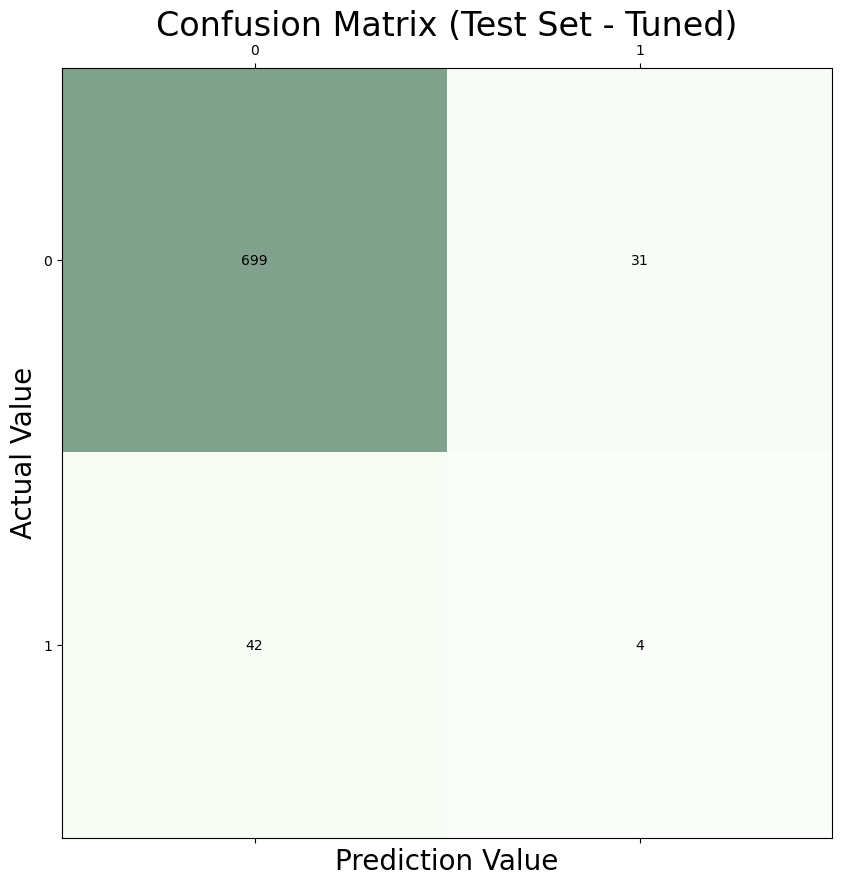

NameError: name 'ROCAUC' is not defined

In [24]:
# Train the model with the tuned hyperparameters
seismic_bumps_LogReg_tuned.fit(X_train, y_train)

# Prediction
y_pred_test_tuned = seismic_bumps_LogReg_tuned.predict(X_test)

# Evaluate the tuned model
print('\nTesting accuracy (Tuned) =', seismic_bumps_LogReg_tuned.score(X_test, y_test))
print("\nClassification Report (Test Set - Tuned):")
print(classification_report(y_test, y_pred_test_tuned))

# Confusion matrix for the tuned model
confusion_matrix_tuned = confusion_matrix(y_test, y_pred_test_tuned)
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(confusion_matrix_tuned, cmap=plt.cm.Greens, alpha=0.5)
for i in range(confusion_matrix_tuned.shape[0]):
    for j in range(confusion_matrix_tuned.shape[1]):
        ax.text(x=j, y=i, s=confusion_matrix_tuned[i, j], va='center', ha='center')

plt.xlabel('Prediction Value', fontsize=20)
plt.ylabel('Actual Value', fontsize=20)
plt.title('Confusion Matrix (Test Set - Tuned)', fontsize=24)
plt.show()

# ROC Curve visualization and ROC AUC score for the tuned model
visualizer_tuned = ROCAUC(seismic_bumps_LogReg_tuned, classes=["Not Recommended", "Recommended"])
visualizer_tuned.fit(X_train, y_train)
visualizer_tuned.score(X_test, y_test)
visualizer_tuned.show()
ROC_score_tuned = roc_auc_score(y_test, y_pred_test_tuned)
print(f"ROC AUC (Tuned): {ROC_score_tuned:.4f}")


## Decision Tree

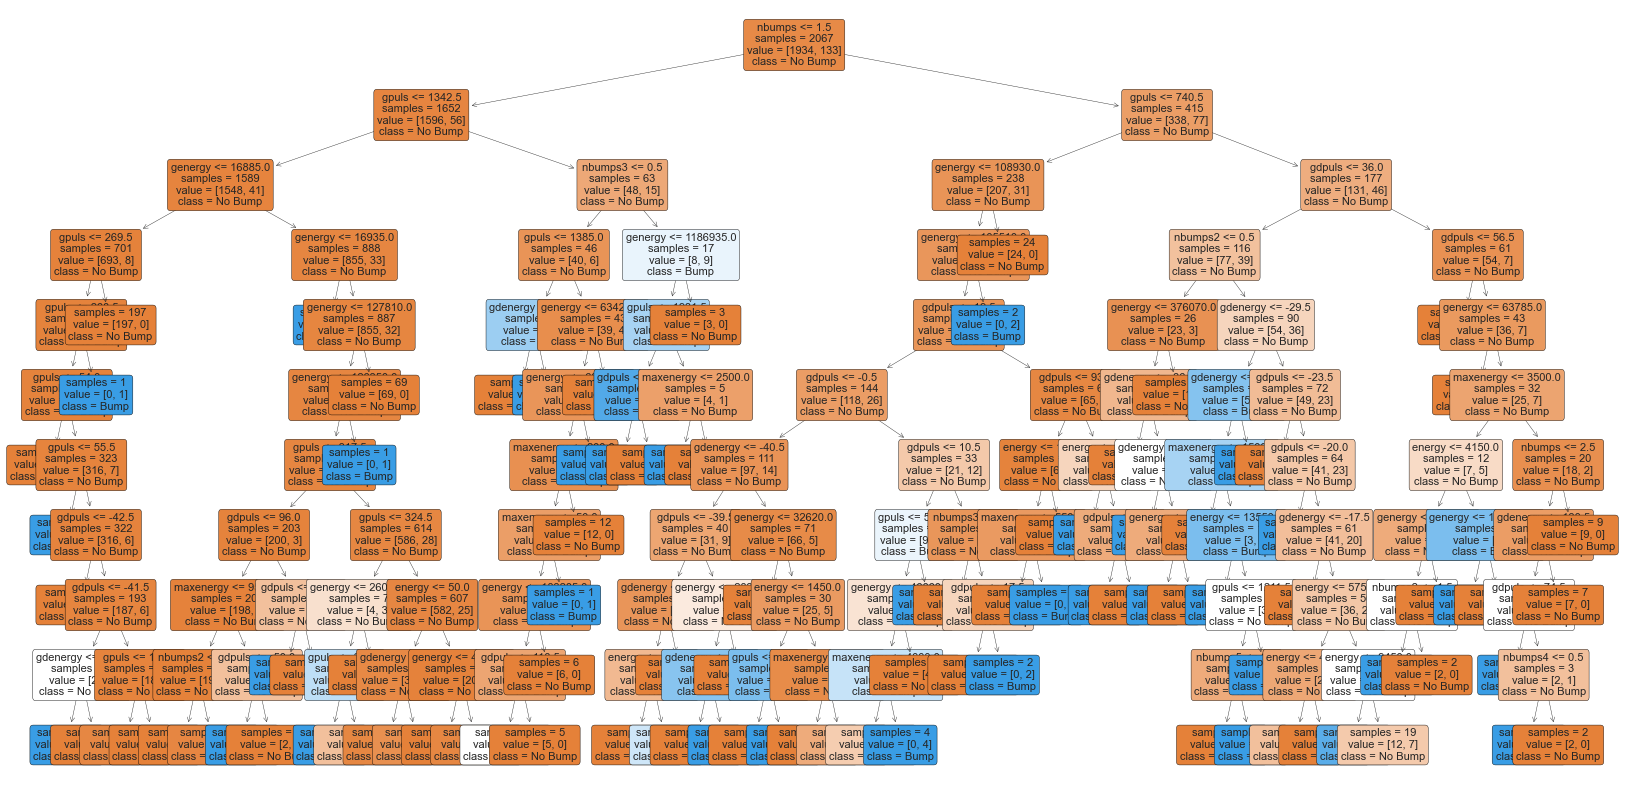

Feature ranking:
1. Feature 'gpuls' : 0.19118813177000993
2. Feature 'gdpuls' : 0.17405023329639727
3. Feature 'genergy' : 0.1713632483494025
4. Feature 'nbumps' : 0.15443454067750514
5. Feature 'gdenergy' : 0.09679072674053622
6. Feature 'energy' : 0.08404674520883279
7. Feature 'maxenergy' : 0.0658201835051919
8. Feature 'nbumps2' : 0.027444363189130835
9. Feature 'nbumps3' : 0.022307487534731673
10. Feature 'nbumps5' : 0.0067900407923779755
11. Feature 'nbumps4' : 0.005764298935883763
12. Feature 'nbumps89' : 0.0
13. Feature 'nbumps7' : 0.0
14. Feature 'nbumps6' : 0.0


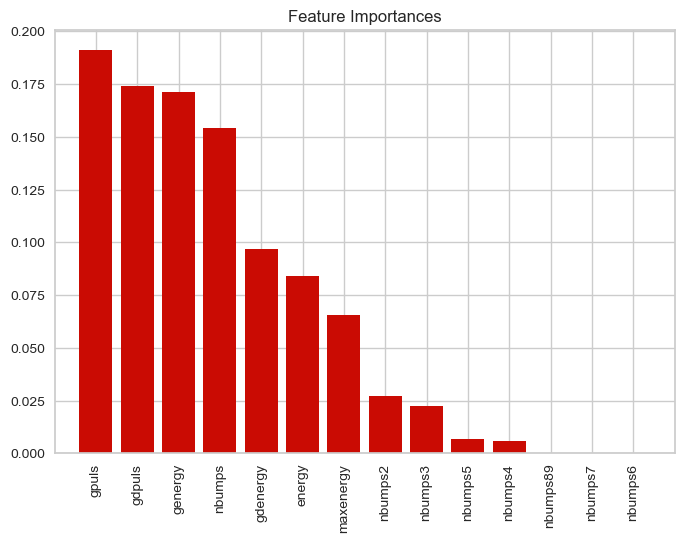

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       480
           1       0.30      0.19      0.23        37

    accuracy                           0.91       517
   macro avg       0.62      0.58      0.59       517
weighted avg       0.89      0.91      0.90       517

Confusion Matrix (Test Set):
[[464  16]
 [ 30   7]]
Best Hyperparameters:
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Classification Report (Tuned Set):
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       480
           1       0.25      0.05      0.09        37

    accuracy                           0.92       517
   macro avg       0.59      0.52      0.52       517
weighted avg       0.88      0.92      0.90       517

Confusion Matrix (Tuned Set):
[[474   6]
 [ 35   2]]


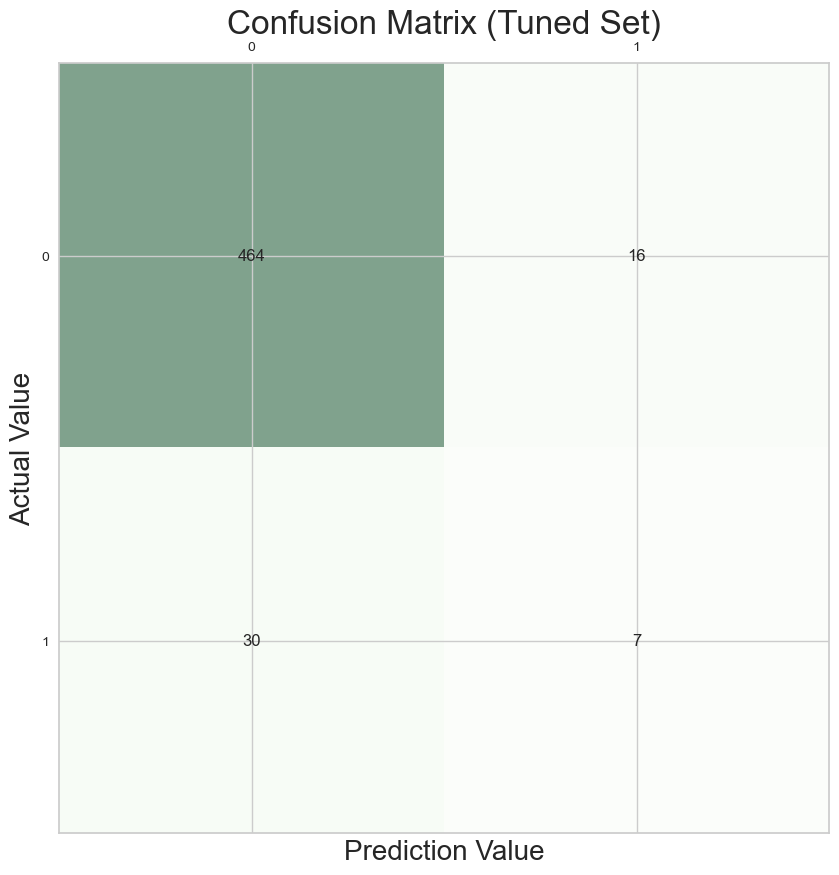

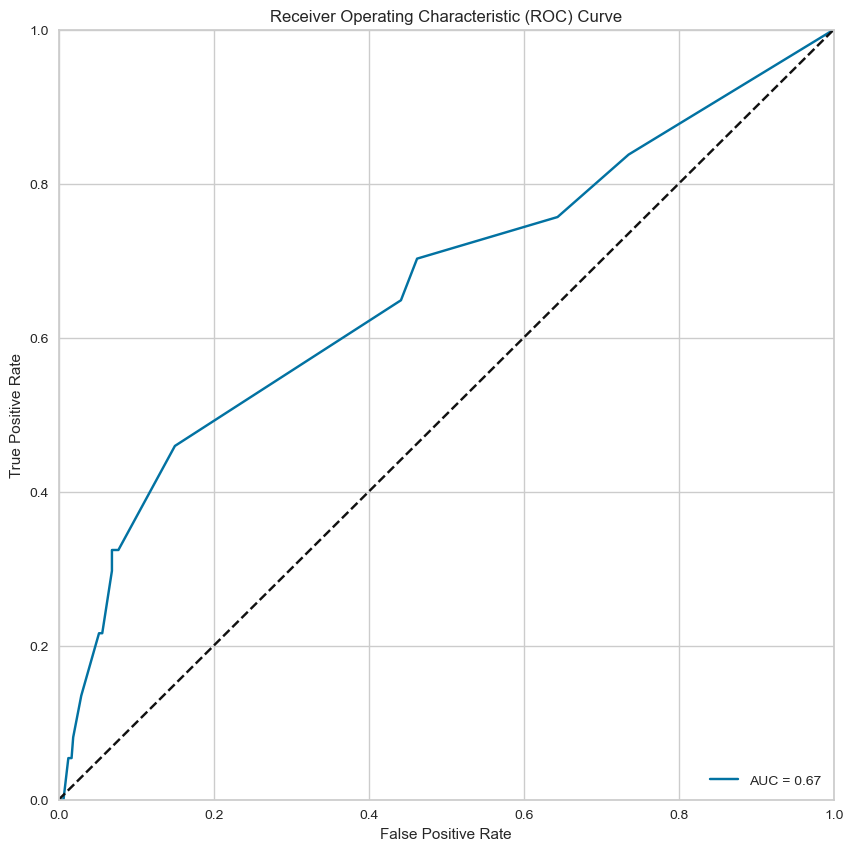

In [78]:
from scipy.io import arff
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

# Loading data file
data, meta = arff.loadarff('seismic_bumps.arff')

# Convert to DataFrame
seismic_bumps = pd.DataFrame(data)
#print(seismic_bumps)

# Handling Catogorial variables and target
pd.get_dummies(seismic_bumps)
seismic_bumps = seismic_bumps.drop(columns=['seismic', 'seismoacoustic','shift','ghazard'])
seismic_bumps['class'] = seismic_bumps['class'].map({b'1': 1, b'0': 0})

# Splitting into X and y variables
X = seismic_bumps.drop('class', axis= 1).values
y = seismic_bumps['class'].astype(int)
feature_names = seismic_bumps.columns[:-1]  # Exclude the 'class' column


# splitting data set inti training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Using Decision tree based estimator 
seismic_bumps_DecTree = DecisionTreeClassifier(random_state=100, criterion='entropy', max_depth=10)
seismic_bumps_DecTree.fit(X_train,y_train)

# Plotting the decision tree
plt.figure(figsize=(20, 10))
plot_tree(seismic_bumps_DecTree, feature_names=feature_names, filled=True, rounded=True, class_names=['No Bump', 'Bump'],impurity=False, fontsize=8)
plt.show()

importances = seismic_bumps_DecTree.feature_importances_
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f+1}. Feature '{feature_names[indices[f]]}' : {importances[indices[f]]}")
plt.figure()
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation='vertical')
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Evaluate the trained model
y_pred_test = seismic_bumps_DecTree.predict(X_test)

# Print classification report and confusion matrix for test set
print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred_test))
print("Confusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_pred_test))

# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the grid search object
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=100),
    param_grid=param_grid,
    cv=5,  # Number of cross-validation folds
    scoring='accuracy'  # Evaluation metric
)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:")
print(grid_search.best_params_)

# Evaluate the model with best hyperparameters on the test set
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)

# Print classification report and confusion matrix for test set
print("Classification Report (Tuned Set):")
print(classification_report(y_test, y_pred_test))
print("Confusion Matrix (Tuned Set):")
print(confusion_matrix(y_test, y_pred_test))

confusion_matrix_tune = confusion_matrix(y_test, y_pred_test)
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(confusion_matrix_test, cmap=plt.cm.Greens, alpha=0.5)
for i in range(confusion_matrix_test.shape[0]):
    for j in range(confusion_matrix_test.shape[1]):
        ax.text(x=j, y=i, s=confusion_matrix_test[i, j], va='center', ha='center')

plt.xlabel('Prediction Value', fontsize=20)
plt.ylabel('Actual Value', fontsize=20)
plt.title('Confusion Matrix (Tuned Set)', fontsize=24)
plt.show()

# Get predicted probabilities for the positive class
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Compute false positive rate, true positive rate, and threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute AUC score
auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



## K-nearest Neibhour

Training accuracy= 0.9413716814159292
Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       719
           1       0.25      0.02      0.03        57

    accuracy                           0.92       776
   macro avg       0.59      0.51      0.50       776
weighted avg       0.88      0.92      0.89       776

Best Hyperparameters: {'n_neighbors': 9, 'weights': 'uniform'}
Testing accuracy (Tuned) = 0.9278350515463918
Classification Report (Test Tuned):
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       719
           1       0.67      0.04      0.07        57

    accuracy                           0.93       776
   macro avg       0.80      0.52      0.51       776
weighted avg       0.91      0.93      0.90       776



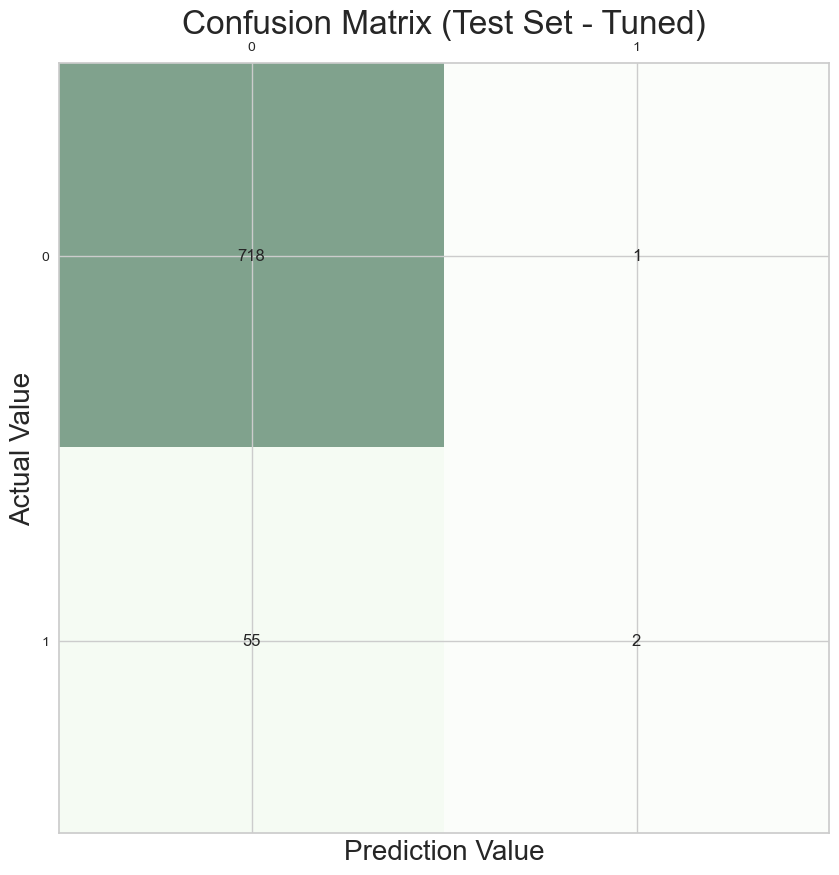

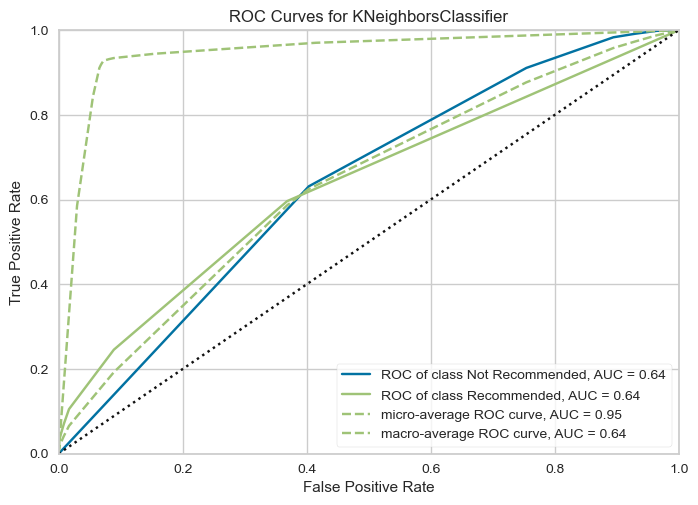

ROC AUC (Tuned): 0.6356


In [76]:
# Import the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from yellowbrick.classifier import ROCAUC

# Loading data file
data, meta = arff.loadarff('seismic_bumps.arff')

# Convert to DataFrame
seismic_bumps = pd.DataFrame(data)

# Handling Categorical variables and target
pd.get_dummies(seismic_bumps)
seismic_bumps = seismic_bumps.drop(columns=['seismic', 'seismoacoustic', 'shift', 'ghazard'])
seismic_bumps['class'] = seismic_bumps['class'].map({b'1': 1, b'0': 0})

# Splitting into X and y variables
X = seismic_bumps.drop('class', axis=1).values
y = seismic_bumps['class'].astype(int)
feature_names = seismic_bumps.columns

# Splitting the dataset into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Define the parameter grid
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}

# Create an instance of k-NN classifier
seismic_bumps_knn = KNeighborsClassifier()
seismic_bumps_knn.fit(X_train,y_train)

y_pred_test = seismic_bumps_knn.predict(X_test)

# Confusion Matrix for test set
print('Training accuracy=', seismic_bumps_knn.score(X_train, y_train))
print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred_test))

# Create GridSearchCV instance
grid_search = GridSearchCV(seismic_bumps_knn, param_grid, cv=5)

# Fit the GridSearchCV instance to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Create a new instance of k-NN classifier with the best hyperparameters
seismic_bumps_knn_tuned = KNeighborsClassifier(**best_params)

# Train the model with the tuned hyperparameters
seismic_bumps_knn_tuned.fit(X_train, y_train)

# Prediction
y_pred_test_tuned = seismic_bumps_knn_tuned.predict(X_test)

# Evaluate the tuned model
print('Testing accuracy (Tuned) =', seismic_bumps_knn_tuned.score(X_test, y_test))
print("Classification Report (Test Tuned):")
print(classification_report(y_test, y_pred_test_tuned))

# Confusion Matrix for tuned k-NN model on test set
confusion_matrix_test_tuned = confusion_matrix(y_test, y_pred_test_tuned)
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(confusion_matrix_test_tuned, cmap=plt.cm.Greens, alpha=0.5)
for i in range(confusion_matrix_test_tuned.shape[0]):
    for j in range(confusion_matrix_test_tuned.shape[1]):
        ax.text(x=j, y=i, s=confusion_matrix_test_tuned[i, j], va='center', ha='center')

plt.xlabel('Prediction Value', fontsize=20)
plt.ylabel('Actual Value', fontsize=20)
plt.title('Confusion Matrix (Test Set - Tuned)', fontsize=24)
plt.show()

# ROC Curve visualization and ROC AUC score for tuned k-NN model
visualizer = ROCAUC(seismic_bumps_knn_tuned, classes=["Not Recommended", "Recommended"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test,y_test)
visualizer.show()
y_pred_proba_test_tuned = seismic_bumps_knn_tuned.predict_proba(X_test)[:, 1]
ROC_score_tuned = roc_auc_score(y_test, y_pred_proba_test_tuned)
print(f"ROC AUC (Tuned): {ROC_score_tuned:.4f}")